Epoch: 11, Loss: 0.43895
Epoch: 21, Loss: 0.36149
Epoch: 31, Loss: 0.28207
Epoch: 41, Loss: 0.25490
Epoch: 51, Loss: 0.23542
Epoch: 61, Loss: 0.24413
Epoch: 71, Loss: 0.27453
Epoch: 81, Loss: 0.26382
Epoch: 91, Loss: 0.24652
Epoch: 101, Loss: 0.21062
Epoch: 111, Loss: 0.25401
Epoch: 121, Loss: 0.23123
Epoch: 131, Loss: 0.20498
Epoch: 141, Loss: 0.24169
Epoch: 151, Loss: 0.19371
Epoch: 161, Loss: 0.21047
Epoch: 171, Loss: 0.22823
Epoch: 181, Loss: 0.24795
Epoch: 191, Loss: 0.22677
Epoch: 201, Loss: 0.20162
Epoch: 211, Loss: 0.24263
Epoch: 221, Loss: 0.26747
Epoch: 231, Loss: 0.24475
Epoch: 241, Loss: 0.22887
Epoch: 251, Loss: 0.22623
Epoch: 261, Loss: 0.26904
Epoch: 271, Loss: 0.23993
Epoch: 281, Loss: 0.25001
Epoch: 291, Loss: 0.21718
Epoch: 301, Loss: 0.24002
Epoch: 311, Loss: 0.21192
Epoch: 321, Loss: 0.24174
Epoch: 331, Loss: 0.21620
Epoch: 341, Loss: 0.20572
Epoch: 351, Loss: 0.22274
Epoch: 361, Loss: 0.21739
Epoch: 371, Loss: 0.24773
Epoch: 381, Loss: 0.22472
Epoch: 391, Loss: 0.2

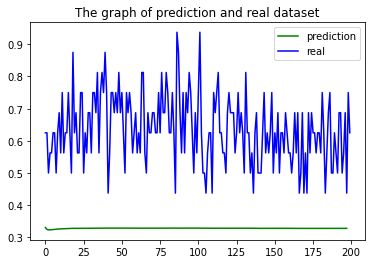

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

from torch._C import device

dataset = np.loadtxt('../heartbeat.txt',dtype='float32')
dataset = dataset.astype(np.float32)
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))
dataset = dataset[0:200]

def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# 创建好输入输出
data_X, data_Y = create_dataset(dataset)

# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

import torch
train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)

from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layer):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(hidden_size,output_size)
        self.dropout2 = nn.Dropout(0.5)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = self.dropout1(x)
        x = x.view(s*b,h)
        x = self.layer2(x)
        x = self.dropout2(x)
        x = x.view(s,b,-1)
        return x

model = lstm(2,4,1,2)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 开始训练
e = 0
for e in range (1000):
    e += 1
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = model(var_x)
    loss = criterion(out, var_y)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e%10 == 0):
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.item()))
    
model = model.eval() # 转换成测试模式

data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = model(var_data) # 测试集的预测结果
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()
# 画出实际结果和预测的结果
plt.plot(pred_test, 'g', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')
plt.title('The graph of prediction and real dataset')
plt.show()
#plt.savefig(str(pathlib.Path(__file__).parent) + '/prediction.png')


In [119]:
pred = np.concatenate([[0],[0], pred_test])

In [120]:
all = np.dstack((pred, dataset))

In [121]:
cnt = []

for i in range(2,100):
    diff = 100 * abs(all[0][i][0] - all[0][i][1]) / all[0][i][1]
    cnt.append(diff)
    

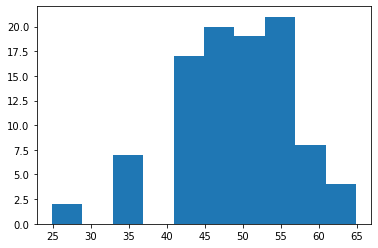

In [122]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cnt)
plt.show()